Polynomial Kernel (C=1) Accuracy: 0.5433
Polynomial Kernel (C=100) Accuracy: 0.5433
RBF Kernel (C=1) Accuracy: 0.9533
RBF Kernel (C=100) Accuracy: 0.9833


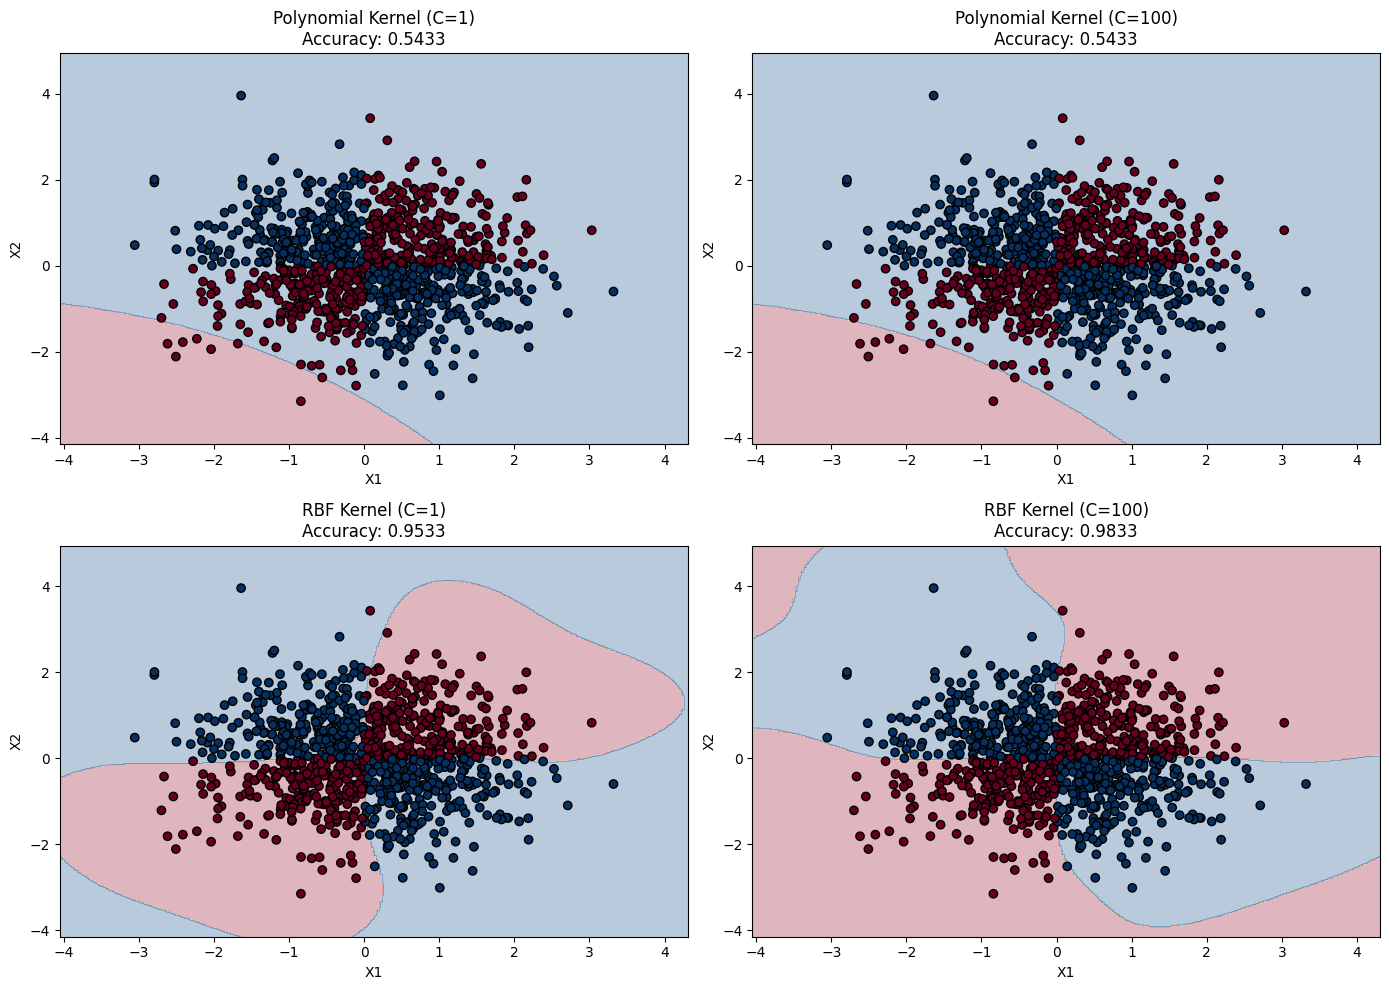

In [1]:
# ==== XOR Problem with Nonlinear Support Vector Machine ====

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# --- Generate XOR dataset with 1000 samples ---
np.random.seed(1)
X_xor = np.random.randn(1000, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# --- Splitting data into 70% training and 30% test data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_xor, y_xor, test_size=0.3, random_state=42)

# --- Standardizing the features ---
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# --- Build SVM models with polynomial kernel (two regularization strengths) ---
svm_poly_weak = SVC(kernel="poly", degree=3, C=1, random_state=42)
svm_poly_weak.fit(X_train_std, y_train)

svm_poly_strong = SVC(kernel="poly", degree=3, C=100, random_state=42)
svm_poly_strong.fit(X_train_std, y_train)

# --- Build SVM models with RBF kernel (two regularization strengths) ---
svm_rbf_weak = SVC(kernel="rbf", gamma='scale', C=1, random_state=42)
svm_rbf_weak.fit(X_train_std, y_train)

svm_rbf_strong = SVC(kernel="rbf", gamma='scale', C=100, random_state=42)
svm_rbf_strong.fit(X_train_std, y_train)

# --- Test the SVM models ---
y_pred_poly_weak = svm_poly_weak.predict(X_test_std)
accuracy_poly_weak = accuracy_score(y_test, y_pred_poly_weak)
print(f"Polynomial Kernel (C=1) Accuracy: {accuracy_poly_weak:.4f}")

y_pred_poly_strong = svm_poly_strong.predict(X_test_std)
accuracy_poly_strong = accuracy_score(y_test, y_pred_poly_strong)
print(f"Polynomial Kernel (C=100) Accuracy: {accuracy_poly_strong:.4f}")

y_pred_rbf_weak = svm_rbf_weak.predict(X_test_std)
accuracy_rbf_weak = accuracy_score(y_test, y_pred_rbf_weak)
print(f"RBF Kernel (C=1) Accuracy: {accuracy_rbf_weak:.4f}")

y_pred_rbf_strong = svm_rbf_strong.predict(X_test_std)
accuracy_rbf_strong = accuracy_score(y_test, y_pred_rbf_strong)
print(f"RBF Kernel (C=100) Accuracy: {accuracy_rbf_strong:.4f}")

# --- Function to plot decision boundaries ---
def plot_decision_boundary(X, y, model, title, ax):
    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Apply standardization to the mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_std = sc.transform(mesh_points)

    # Predict on the mesh grid
    Z = model.predict(mesh_points_std)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

# --- Plot the decision boundaries ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

plot_decision_boundary(
    X_xor, y_xor,
    svm_poly_weak,
    f"Polynomial Kernel (C=1)\nAccuracy: {accuracy_poly_weak:.4f}",
    axs[0]
)

plot_decision_boundary(
    X_xor, y_xor,
    svm_poly_strong,
    f"Polynomial Kernel (C=100)\nAccuracy: {accuracy_poly_strong:.4f}",
    axs[1]
)

plot_decision_boundary(
    X_xor, y_xor,
    svm_rbf_weak,
    f"RBF Kernel (C=1)\nAccuracy: {accuracy_rbf_weak:.4f}",
    axs[2]
)

plot_decision_boundary(
    X_xor, y_xor,
    svm_rbf_strong,
    f"RBF Kernel (C=100)\nAccuracy: {accuracy_rbf_strong:.4f}",
    axs[3]
)

plt.tight_layout()
plt.show()